In [1]:
import pandas as pd
from api import JolpicaF1API
from utils import get_constructor_colours, convert_lap_time_to_ms
from quali_plot_utils import plot_quali_drivers, plot_quali_constructors

In [2]:
api = JolpicaF1API()

In [3]:
qualifying_results = api.get_qualifying_results('2025', 12)

In [4]:
races = qualifying_results['MRData']['RaceTable']['Races']

In [5]:
quali = races[0]['QualifyingResults']

In [6]:
df = pd.json_normalize(quali, sep='_')

In [7]:
constructor_colors = get_constructor_colours()

In [8]:
sessions = ["Q1", "Q2", "Q3"]

# Convert lap times for the valid sessions to milliseconds
for session in sessions:
    df[f'{session}_ms'] = df[session].apply(convert_lap_time_to_ms)

# Collect session columns for which we have times in milliseconds
sessions_ms_columns = [f'{s}_ms' for s in sessions]

if sessions_ms_columns:
    # Calculate the fastest lap time for each driver across the sessions
    df['fastest_lap_ms'] = df[sessions_ms_columns].min(axis=1, skipna=True)

    # Convert fastest lap from milliseconds back to time format
    df['fastest_lap'] = df['fastest_lap_ms']

# Calculate the time difference from the fastest lap
df['timeDiff'] = (df['fastest_lap_ms'] - df['fastest_lap_ms'].min()) / 6000
df = df.sort_values(by='timeDiff')

# Assign colors to teams
df['color'] = df['Constructor_name'].map(constructor_colors)

# Qualifying Analysis

f:\Coding\Portfolio\F1DataAnalysis\quali_plot_utils.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  quali_data['color'].fillna('gray', inplace=True)


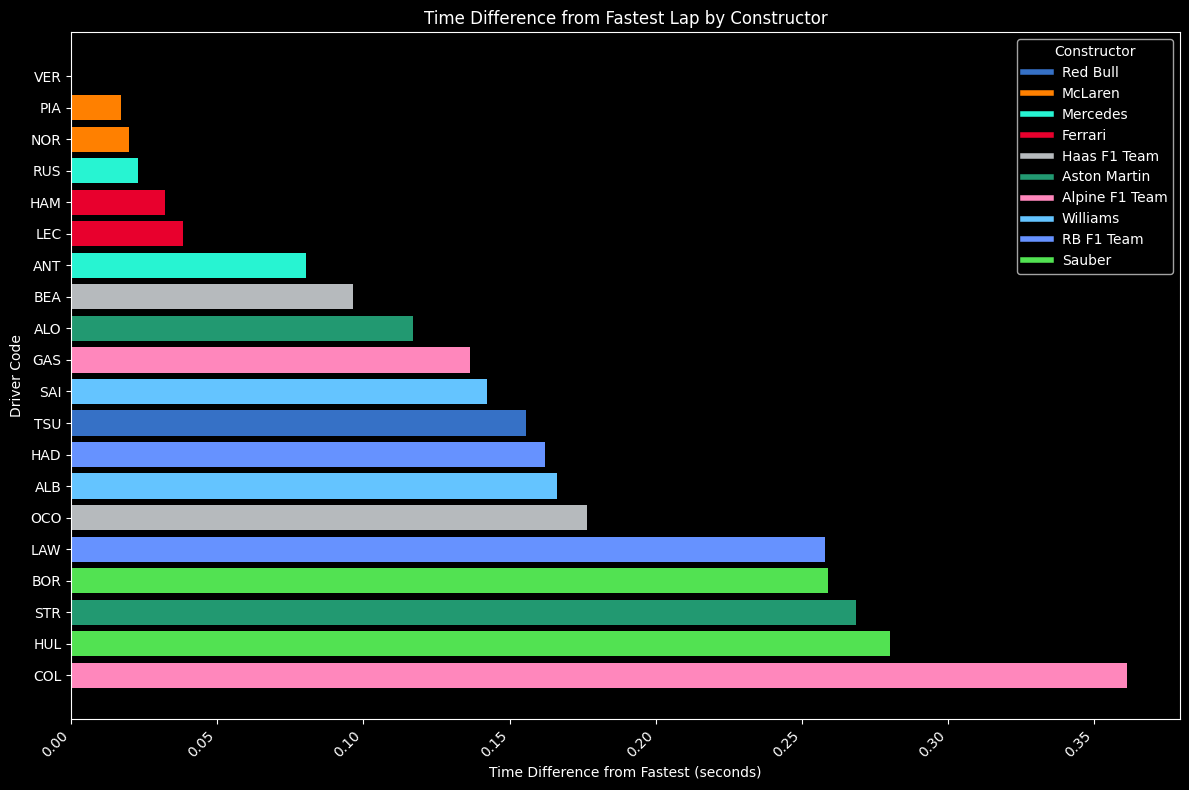

In [9]:
plot_quali_drivers(df)

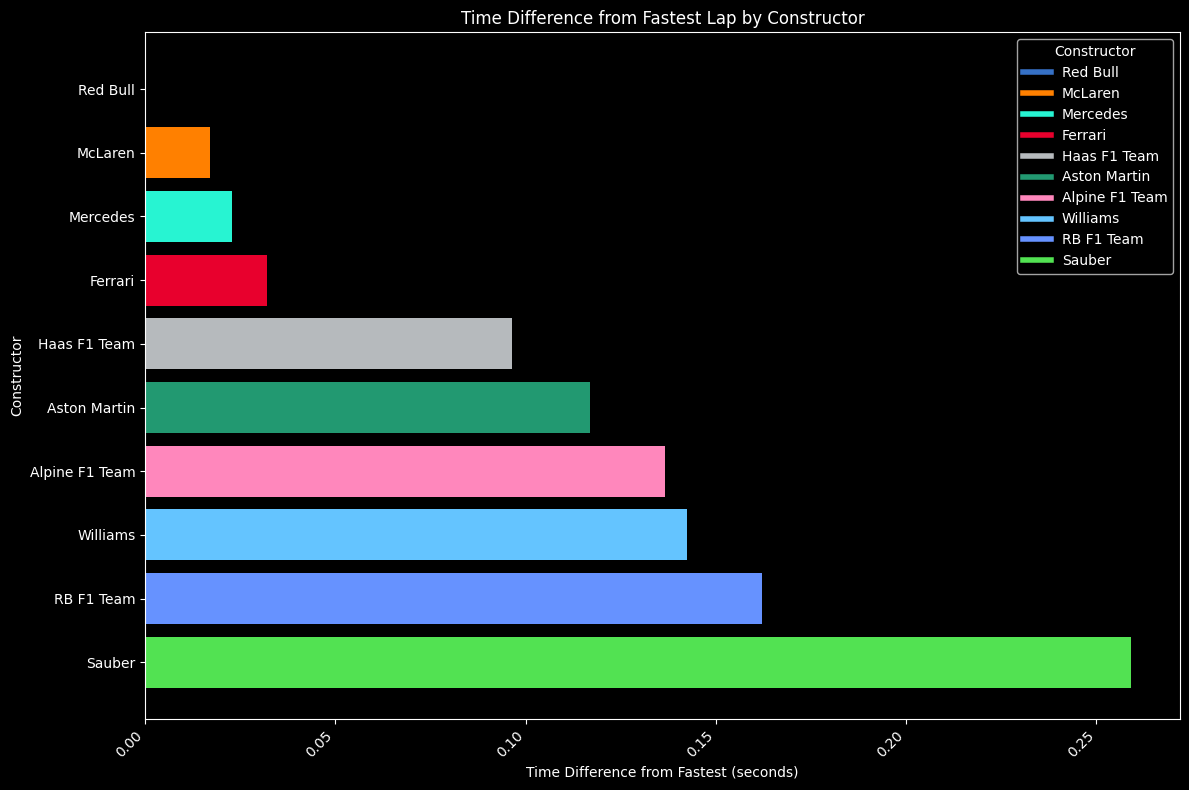

In [10]:
plot_quali_constructors(df)